# Importing Packages

### 1) import tensoflow and other related packages

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from pandas.api.types import CategoricalDtype 
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
import keras_tuner as kt
#%load_ext tensorboard => I am running tensorboard from Terminal


### 2) import additional packages

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import shutil
import os
import time
import json

plt.rcParams['figure.figsize'] = [6, 4]
sns.set_style("dark")
base_log_dir = "./logs/"

if not os.path.exists(base_log_dir):
    os.makedirs(base_log_dir)
    
cmap = plt.get_cmap("Set2")
Colors = np.array(cmap.colors)


### 3) simple utils to handel some implementation

In [3]:
def CalculateMetricsAndPlot(true_label, predicted_label,color="Blues",text=""):
    CM = confusion_matrix(true_label, predicted_label)
    acc = round(accuracy_score(true_label,predicted_label)*100,2)
    precision = round(precision_score(true_label,predicted_label, average='macro'),2)
    if text == "":
        sns.heatmap(CM ,annot=True, cmap=color, fmt='g').set_title("Confusion Matrix for Test Data | Accuracy={0}% | Precision={1}".format(acc,precision))
    else :
        sns.heatmap(CM ,annot=True, cmap=color, fmt='g').set_title("Confusion Matrix for Test Data | Accuracy={0}% | Precision={1} | {2}".format(acc,precision,text))
    
    plt.show()

# Loading Dataset & Split

In [4]:
with open('X_test-3.npy', 'rb') as f:
    X_test = np.load(f)
with open('X_valid-3.npy', 'rb') as f:
    X_valid = np.load(f)
with open('X_train-3.npy', 'rb') as f:
    X_train = np.load(f)
    
with open('Y_test-3.npy', 'rb') as f:
    Y_test = np.load(f)
with open('Y_valid-3.npy', 'rb') as f:
    Y_valid = np.load(f)
with open('Y_train-3.npy', 'rb') as f:
    Y_train = np.load(f)
      
Total_count = X_train.shape[0]+X_valid.shape[0]+X_test.shape[0]
Y_test,Y_valid,Y_train = Y_test-1,Y_valid-1,Y_train-1

print("percentage of Train: {0}%".format(round(X_train.shape[0]/Total_count*100,2)))
print("percentage of Validation: {0}%".format(round(X_valid.shape[0]/Total_count*100,2)))
print("percentage of Test: {0}%".format(round(X_test.shape[0]/Total_count*100,2)))


percentage of Train: 60.68%
percentage of Validation: 10.71%
percentage of Test: 28.61%


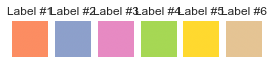

In [29]:
for i in range(len(Colors)):
    plt.subplot(1,len(Colors),i+1)
    plt.imshow(np.ones((100,100,3))*Colors[i+1])
    plt.axis("off")
    plt.title("Label #{0}".format(i+1))
    if i == 5:
        break
plt.show()

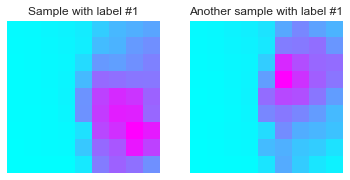

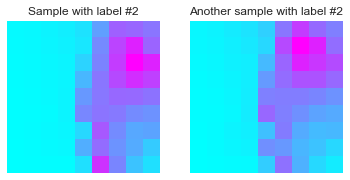

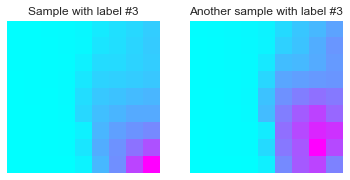

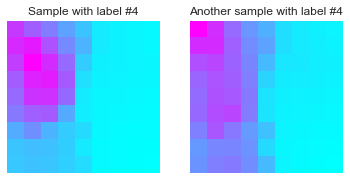

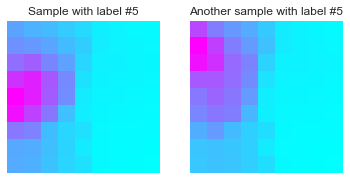

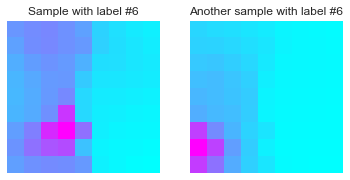

In [30]:
for i in range(6):
    rand_i = np.random.randint(1,140)
    x1,x2 = X_valid[Y_valid[:,0]==i][rand_i:rand_i+2]
    plt.subplot(1,2,1)
    plt.imshow(x1,cmap="cool")
    plt.axis("off")
    plt.title("Sample with label #{0}".format(i+1))
    plt.subplot(1,2,2)
    plt.imshow(x2,cmap="cool")
    plt.axis("off")
    plt.title("Another sample with label #{0}".format(i+1))
    plt.show()